# $$MonoForest\ Framework\ Tutorial$$

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/catboost/tutorials/blob/master/model_analysis/monoforest_tutorial.ipynb)

##### $MonoForest$ is a framework to transform ensemble of decision trees from traditional graph model to polynomial form.
##### Polynomial is a sum of monomials.
##### Each monomial is defined by:
* value (how much prediction value changes)
* set of conditions (a.k.a splits)
* weight (how much points from learning dataset satisfy conditions of this monomial).
##### Polinomial form allows to do model-wide analysis instead of tree-wide.
##### In this tutorial we will see how analysis of model can be performed with help of MonoForest framework.
##### Framework is based on the paper "MonoForest framework for tree ensemble analysis" by Igor Kuralenok, Vasily Ershov and Igor Labutin [<a>https://nips.cc/Conferences/2019/Schedule?showEvent=14311</a>]

In [1]:
# Import necessary libraries
from catboost import CatBoostClassifier, CatBoostRegressor, monoforest
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Example with Boston dataset

For the first example let's take 'Boston' dataset from sklearn. This dataset contains features of houses and the target is price of houses.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
print("Shape of features: ", boston.data.shape)

Shape of features:  (506, 13)


Let's train small model to see polynomial representation

In [67]:
model = CatBoostRegressor(iterations=5, max_depth=3)
model.fit(boston.data, boston.target)

0:	learn: 9.0093958	total: 7.64ms	remaining: 30.6ms
1:	learn: 8.8366476	total: 11ms	remaining: 16.5ms
2:	learn: 8.6816967	total: 16.2ms	remaining: 10.8ms
3:	learn: 8.5510603	total: 21.2ms	remaining: 5.3ms
4:	learn: 8.4259116	total: 25.8ms	remaining: 0us


In [4]:
monoforest.to_polynom(model)

[(-0.3360926600712766) * [F9 > 567.5][F12 > 10.25] <weight=125.0>,
 (0.23854733322046123) * [F5 > 7.121000289916992] <weight=54.0>,
 (-0.17118946623380893) * [F12 > 10.25] <weight=279.0>,
 (-0.5535056303820198) * [F5 > 7.014999866485596][F9 > 567.5] <weight=5.0>,
 (-0.5951303926761635) * [F0 > 7.036504745483398][F5 > 6.753999710083008] <weight=8.0>,
 (0.36221767157908635) * [F5 > 6.753999710083008] <weight=101.0>,
 (-0.09869084562936245) * [F5 > 6.30150032043457][F9 > 387.5] <weight=74.0>,
 (-0.3630028988160471) * [F0 > 7.036504745483398][F12 > 11.235000610351562] <weight=81.0>,
 (0.20142226122176154) * [F9 > 567.5] <weight=137.0>,
 (-0.2638978511901868) * [F5 > 7.014999866485596][F12 > 10.25] <weight=3.0>,
 (0.3342530345325465) * [F7 > 2.1052498817443848][F12 > 9.675000190734863] <weight=186.0>,
 (0.026750982764025377) * [F5 > 7.121000289916992][F6 > 64.89999389648438] <weight=27.0>,
 (-0.15088079141862987) * [F12 > 11.235000610351562] <weight=257.0>,
 (0.08886858200450351) * [F5 > 6.

We can see that polynomial contains conditions primarly with features 2, 5, 7 and 12. Possibly these features contains the most important information. Now let's fit a bigger model and explore dependence of target value on each feature and average influence of each feature on predicted value (features strength).

0:	learn: 9.0076390	total: 6.99ms	remaining: 342ms
10:	learn: 7.5884310	total: 65.1ms	remaining: 231ms
20:	learn: 6.4249574	total: 121ms	remaining: 167ms
30:	learn: 5.5547127	total: 180ms	remaining: 110ms
40:	learn: 4.9241776	total: 238ms	remaining: 52.3ms
49:	learn: 4.4267805	total: 296ms	remaining: 0us


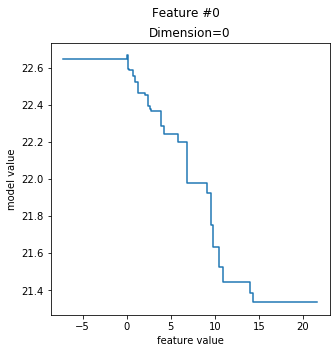

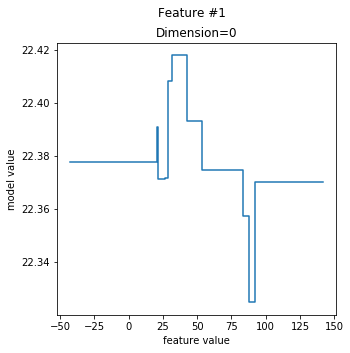

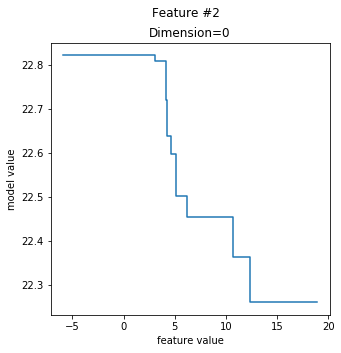

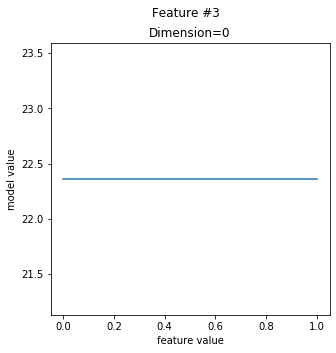

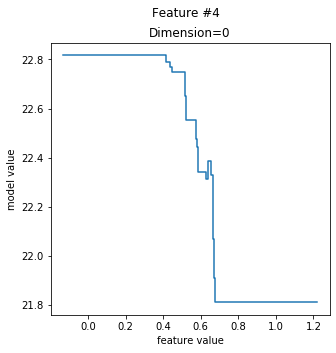

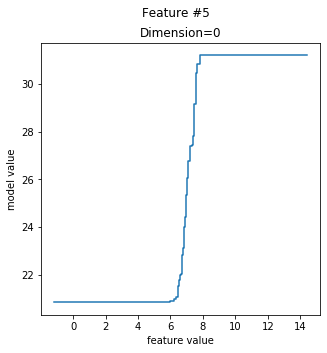

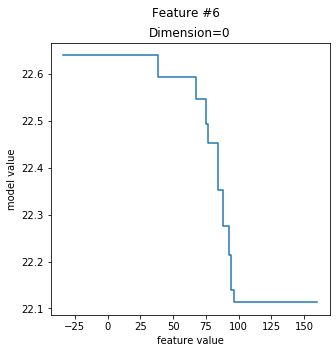

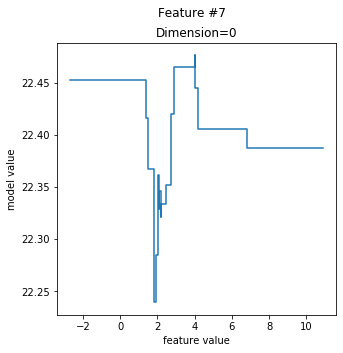

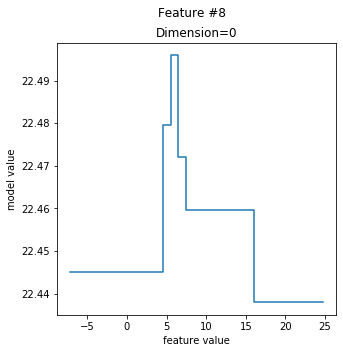

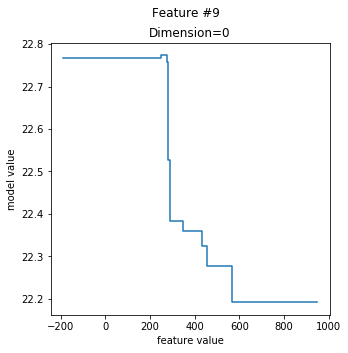

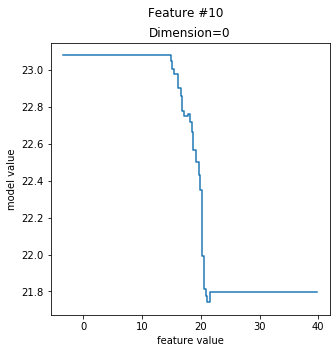

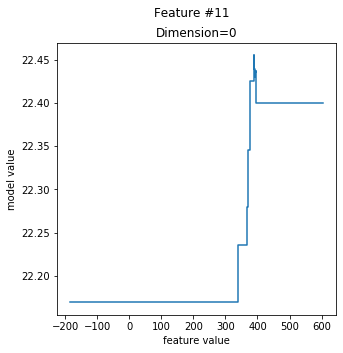

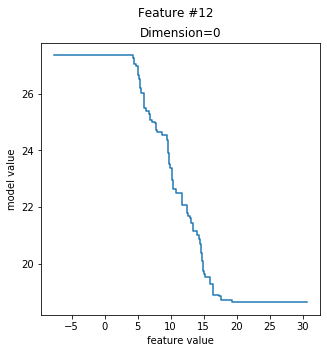

In [5]:
model = CatBoostRegressor(iterations=50)
model.fit(boston.data, boston.target, verbose=10)
monoforest.plot_pdp(model)

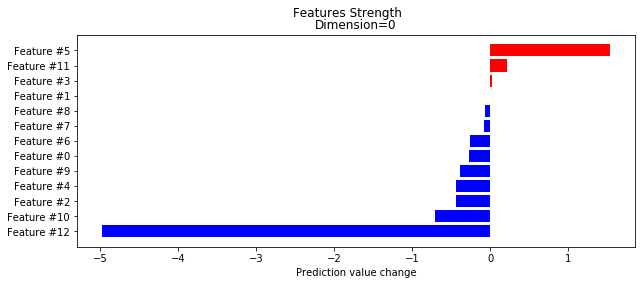

In [6]:
monoforest.plot_features_strength(model, height_per_feature=0.3, width_per_plot=10)

Instead of using these handy functions you can get explanation for each feature and analyze it by your custom methods.

In [7]:
explanations = monoforest.explain_features(model)
expl = explanations[1]
print("Feature: ", expl.feature)
print("Bias: ", expl.expected_bias)
print("Value changes:")
for border_expl in expl.borders_explanations:
    print(border_expl)

Feature:  1
Bias:  [22.377878094259746]
Value changes:
(border=6.25, probability=0.2648221343873518, value_change=[0.013055730511898902])
(border=20.5, probability=0.19960474308300397, value_change=[-0.01966157944026211])
(border=21.5, probability=0.191699604743083, value_change=[0.0006295725366007092])
(border=26.5, probability=0.15217391304347827, value_change=[0.03658268637094144])
(border=29.0, probability=0.14624505928853754, value_change=[0.009554202355206024])
(border=31.5, probability=0.13438735177865613, value_change=[-0.02494660710687119])
(border=42.5, probability=0.1007905138339921, value_change=[-0.018414643084601917])
(border=53.75, probability=0.08300395256916997, value_change=[-0.017299300739722454])
(border=83.75, probability=0.023715415019762844, value_change=[-0.032556489114970326])
(border=87.5, probability=0.019762845849802372, value_change=[0.04547533558079825])
(border=92.5, probability=0.009881422924901186, value_change=[-0.032465184490010575])


In [8]:
for feature_name, feature_expl in zip(boston.feature_names, explanations):
    print("Feature #{} '{}', strength={}".format(feature_expl.feature, feature_name, feature_expl.calc_strength()))

Feature #0 'CRIM', strength=[-0.2691852093125575]
Feature #1 'ZN', strength=[-0.00022083482538737286]
Feature #2 'INDUS', strength=[-0.44376248207255986]
Feature #3 'CHAS', strength=[0.016342705307803528]
Feature #4 'NOX', strength=[-0.43901005024547507]
Feature #5 'RM', strength=[1.5275578548079145]
Feature #6 'AGE', strength=[-0.2619165200741341]
Feature #7 'DIS', strength=[-0.07460416822418729]
Feature #8 'RAD', strength=[-0.06745291497828856]
Feature #9 'TAX', strength=[-0.3902675270624572]
Feature #10 'PTRATIO', strength=[-0.7024190993225915]
Feature #11 'B', strength=[0.20847656894632202]
Feature #12 'LSTAT', strength=[-4.969616877155354]


### Example with MNIST dataset

Now let's take MNIST dataset and find the most important pixels for each digit.

In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [11]:
df = pd.read_csv('./mnist.tsv', header=None, sep='\t')
df.shape

(60000, 788)

In [62]:
X = mnist.data
y = mnist.target.astype(int)

Function $plot\_features\_strength$ is not practical here, so we will make custom plots. These images show which areas of image are most important for each digit. For some digits we can distinctly see familiar images. Fitting takes quite a lot of time.

In [65]:
fstr_images = []
for digit in range(10):
    print("Fitting model for digit {}".format(digit))
    model = CatBoostClassifier(loss_function='Logloss', iterations=2000, learning_rate=0.02, 
                               leaf_estimation_iterations=1, leaf_estimation_method="Gradient")
    y_digit = (y == digit).astype(int)
    model.fit(X, y_digit, verbose=200)
    explanations = monoforest.explain_features(model)
    fstr = np.zeros(784)
    for i in range(784):
        fstr[i] = explanations[i].calc_strength(dim=0)
    fstr = np.reshape(fstr, (28, 28))
    fstr_images.append(fstr)
fstr_images = np.array(fstr_images)

Fitting model for digit 0
0:	learn: 0.6886337	total: 54.6ms	remaining: 1m 49s
200:	learn: 0.2700602	total: 10.5s	remaining: 1m 33s
400:	learn: 0.1645564	total: 20.8s	remaining: 1m 23s
600:	learn: 0.1200061	total: 31.3s	remaining: 1m 12s
800:	learn: 0.0953179	total: 41.7s	remaining: 1m 2s
1000:	learn: 0.0800424	total: 52.2s	remaining: 52.1s
1200:	learn: 0.0695342	total: 1m 2s	remaining: 41.7s
1400:	learn: 0.0618217	total: 1m 13s	remaining: 31.3s
1600:	learn: 0.0560027	total: 1m 23s	remaining: 20.8s
1800:	learn: 0.0513557	total: 1m 33s	remaining: 10.4s
1999:	learn: 0.0475162	total: 1m 44s	remaining: 0us
Fitting model for digit 1
0:	learn: 0.6886548	total: 55.1ms	remaining: 1m 50s
200:	learn: 0.2719173	total: 10.7s	remaining: 1m 36s
400:	learn: 0.1662741	total: 21.4s	remaining: 1m 25s
600:	learn: 0.1212860	total: 32.1s	remaining: 1m 14s
800:	learn: 0.0964201	total: 42.8s	remaining: 1m 4s
1000:	learn: 0.0804385	total: 53.6s	remaining: 53.5s
1200:	learn: 0.0696504	total: 1m 5s	remaining: 43

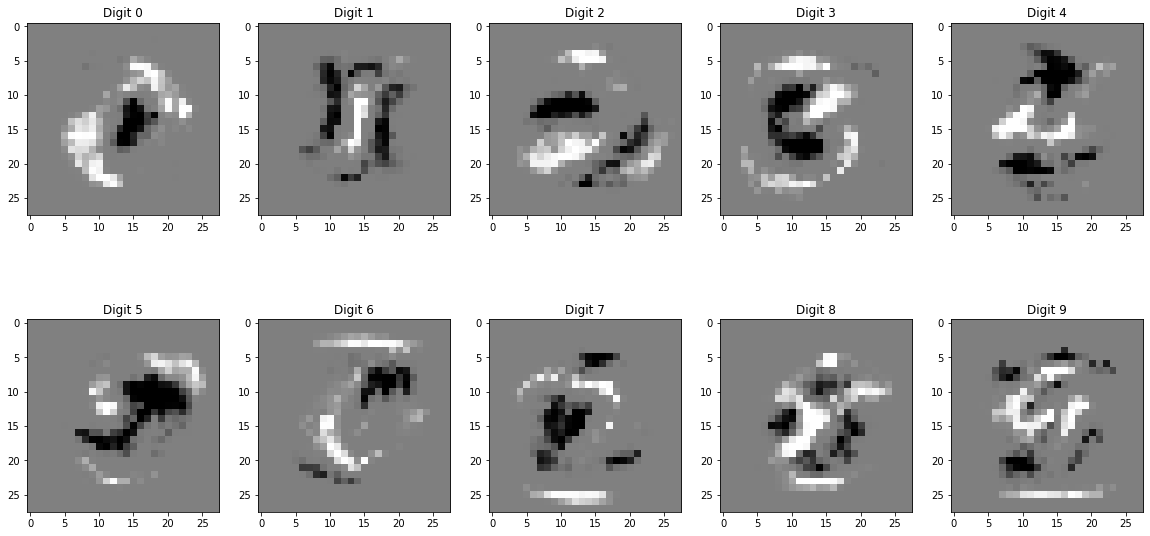

In [66]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(20, 10)
for digit in range(10):
    ax[digit // 5][digit % 5].imshow(1.0 / (1.0 + np.exp(-200*fstr_images[digit])), cmap='gray')
    ax[digit // 5][digit % 5].set_title("Digit {}".format(digit))